#  Lab 5: 分类与回归树CART —— 分类树

# 鸢尾花(Iris)分类

输出Y(三类)：0: 山鸢尾(Iris-setosa); 1: 变色鸢尾(Iris-versicolor); 2: 维吉尼亚鸢尾(Iris-virginica)

4个特征X：SepalLength: 花萼长度； SepalWidth: 花萼宽度； PetalLength: 花瓣长度； PetalWidth:花瓣宽度

## 1. 导入Iris data

In [1]:
import os
import sys
import pandas as pd

path = os.path.dirname(os.getcwd())
sys.path.append(path)

from common.filesio import FilesIO

data = pd.read_csv(FilesIO.getLectureData('IRIS.csv')) 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2. 探索性分析

### 查看输出Y：species

In [3]:
outcome_count = data['species'].value_counts()
print(outcome_count)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


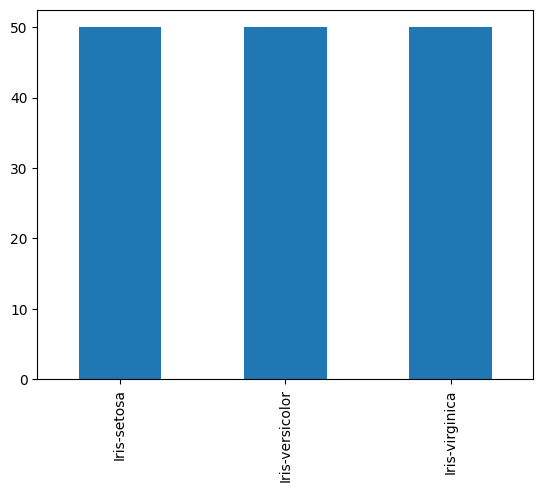

In [4]:
import matplotlib.pyplot as plt

outcome_count.plot(kind = 'bar')
plt.show()

### 查看特征

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

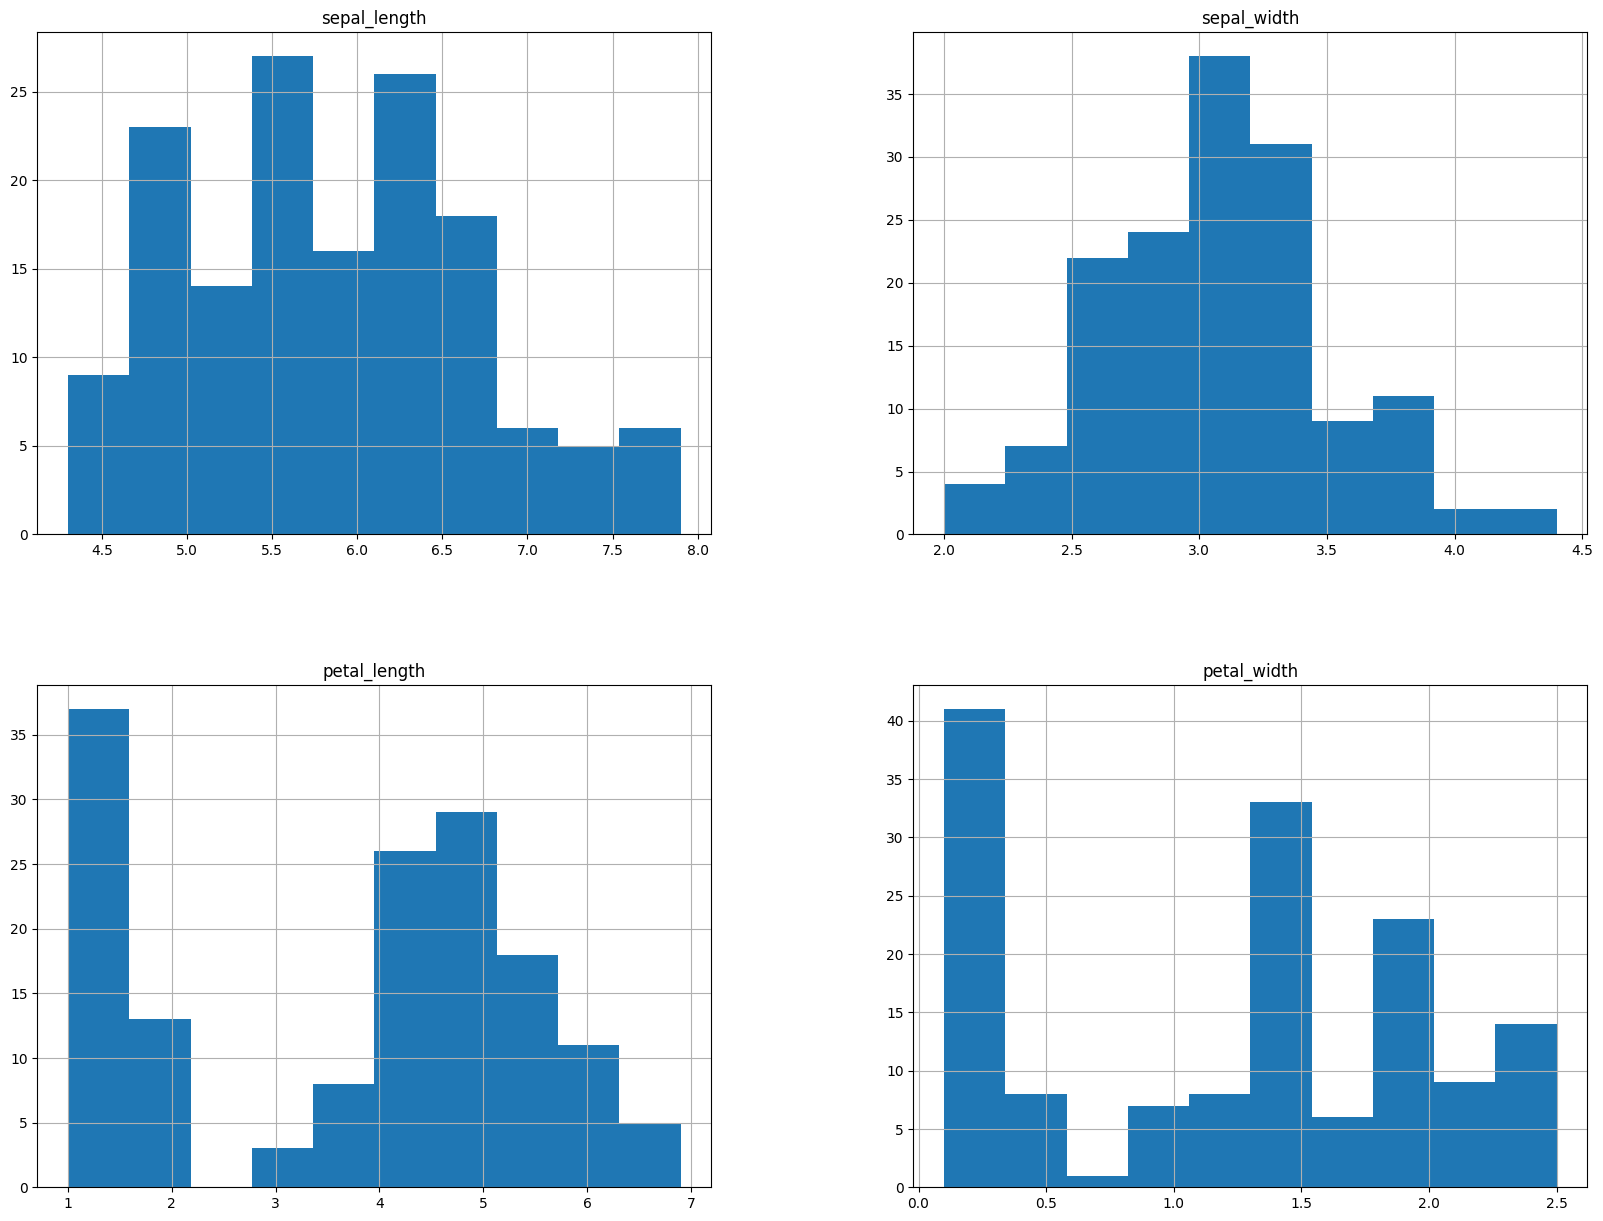

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
data.hist(figsize = (20, 15))

### 箱线图：看特征与species是否相关

<AxesSubplot:xlabel='species', ylabel='petal_length'>

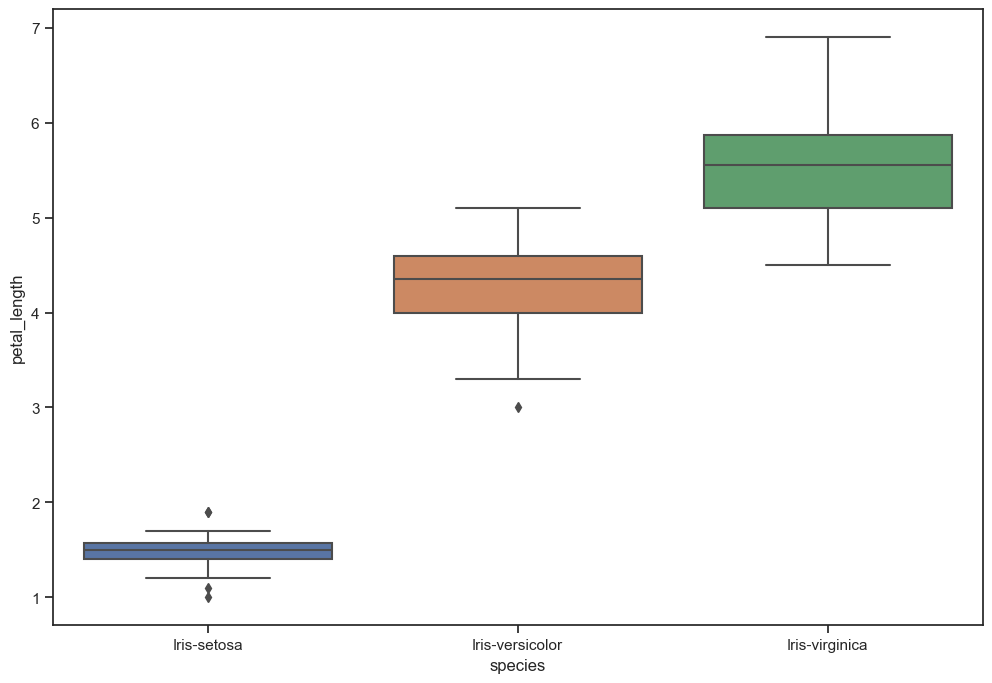

In [6]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(12,8)})
sns.set_style('ticks') 
"""
style: dict, or one of {darkgrid, whitegrid, dark, white, ticks} 
A dictionary of parameters or the name of a preconfigured style.
"""
sns.boxplot(x = "species", y = "petal_length", data = data) 

### Q： 请画出其他三个特征与种类species的箱线图

## 3. 构建训练、测试集，训练分类树

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['species'], axis=1)
y = data.species

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
X_train.shape

(112, 4)

In [9]:
X_test.shape

(38, 4)

### 训练分类树: 未剪枝树

决策树: DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)[source]



criterion: 切分原则。可选{“gini”, “entropy”, “log_loss”}，默认用基尼指数gini index

max_depth: 树的最大深度。如果None，则扩展节点直到所有叶子都是纯的或直到所有叶子包含少于 min_samples_split 样本。

min_samples_split：切分一个内部结点所需的最小样本数。默认为2

min_samples_leaf：叶结点所需的最小样本数。任何深度的切分点只有在左右分支中至少留下min_samples_leaf训练样本时才会被考虑。默认为1

### 定义分类树（未剪枝）模型

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

### 在训练集上拟合分类树

In [11]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

## 4. 画决策树

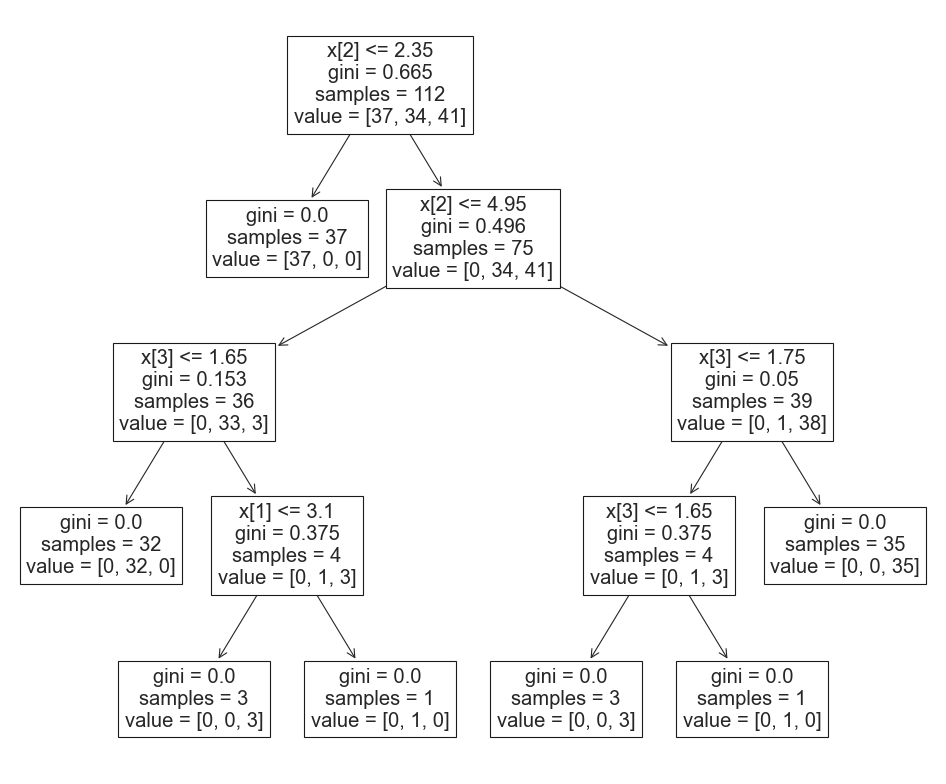

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.style.use('classic')

plt.style.use('seaborn-white')

plt.figure(figsize = [15,12])
plot_tree(clf)
plt.show()

### 美观决策树

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree

feature_names: 特征名； class_names: True 显示类别
filled: 默认=False，如果设为True，颜色代表多数派的类别，颜色越深，则该结点越纯。

In [13]:
37/112*(1-37/112)+(34/112)*(1-34/112)+(41/112)*(1-41/112)

0.6647002551020408

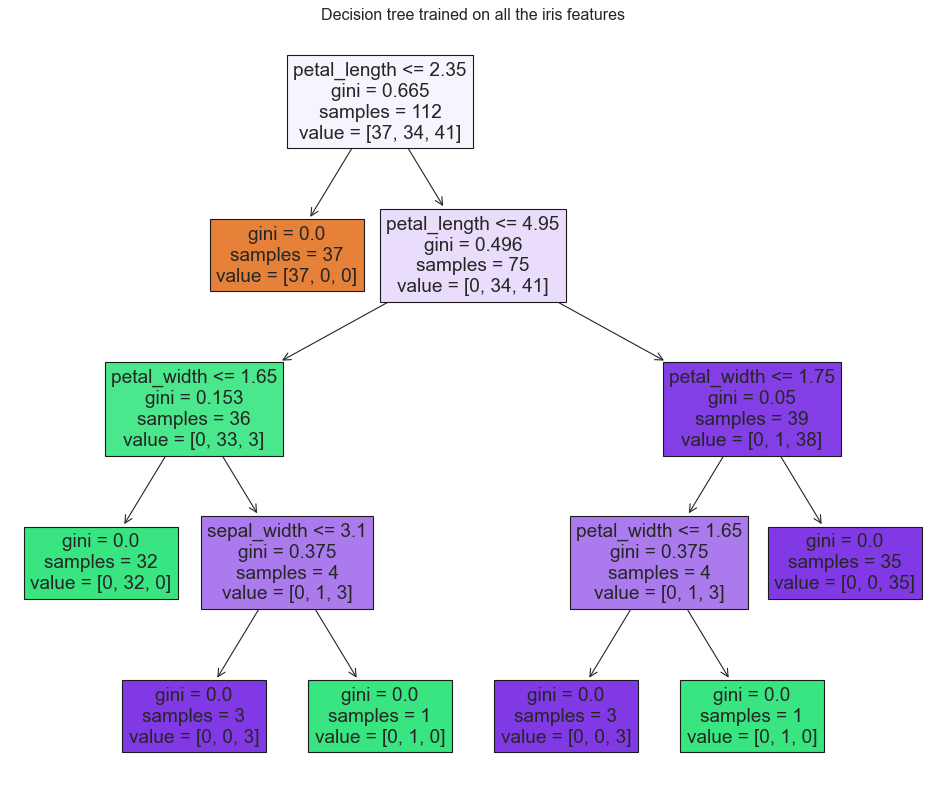

In [14]:
plt.figure(figsize = [15,12])
feature_name = list(X.columns)
plot_tree(clf, filled=True, feature_names = feature_name, class_names = None)
plt.title("Decision tree trained on all the iris features")
plt.show()

### 特征重要性

feature_importances_ 计算特征的重要性，根据Gini index。如果引入该特征, Gini index减少的越多则该特征越重要。 

petal_length    0.899945
petal_width     0.079906
sepal_width     0.020149
sepal_length    0.000000
dtype: float64


<AxesSubplot:>

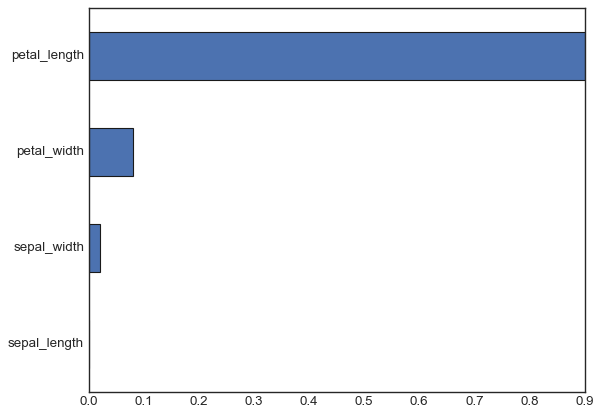

In [15]:
import pandas as pd

importances = clf.feature_importances_


weights = pd.Series(importances,
                 index=X.columns)

print(weights.sort_values(ascending=False))


weights.sort_values().plot(kind = 'barh')

## 5. 在测试集上做预测

预测类别：用predict

In [16]:
y_pred = clf.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

对每个测试实例，在每个类别上的预测概率

In [17]:
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

## 6. 评价模型

### 正确率

In [18]:
test_accuracy = clf.score(X_test, y_test)
print("Accuracy", test_accuracy)

Accuracy 0.9736842105263158


## precision、recall、F1 score

### 对多分类问题，需要设置average。三种选择：
1. micro 微平均

2. macro 宏平均

3. weighted 加权平均

1. average = 'micro':

对输出Y的所有类别全局性计算总的真阳(true positives),总的假阴(false negatives),总的假阳(false positives). 
以精确率为例：

Precision = (TP1+TP2+TP3)/(TP1+FP1+TP2+FP2+TP3+FP3)

在micro指标下，样本的precision_score和recall都等于accuracy_scroe。

In [19]:
from sklearn import metrics
test_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print("Precision", test_precision)

test_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print("Recall:", test_recall)

test_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print("test_f1:", test_f1)

Precision 0.9736842105263158
Recall: 0.9736842105263158
test_f1: 0.9736842105263158


2. 'macro':

对输出Y的每一类单独计算precision,recall,f1, 并求所有类的均值. 这种方式未考虑到Y的每类实例数很不同的情况

以精确率为例：
Precision = (Precision1+Precision2+Precision3)/3

In [20]:
from sklearn import metrics
test_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print("Precision", test_precision)

test_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print("Recall:", test_recall)

test_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print("test_f1:", test_f1)

Precision 0.9666666666666667
Recall: 0.9791666666666666
test_f1: 0.9717034521788342


3. 'weighted':

Macro算法的改良版，不再是取算术平均，对每一类别的精确率进行加权平均，权重为各类别数在y_test中所占比例。解决Macro中没有考虑样本不均衡的问题

In [21]:
from sklearn import metrics
test_precision = metrics.precision_score(y_test, y_pred, average = 'weighted')
print("Precision", test_precision)

test_recall = metrics.recall_score(y_test, y_pred, average = 'weighted')
print("Recall:", test_recall)

test_f1 = metrics.f1_score(y_test, y_pred, average = 'weighted')
print("test_f1:", test_f1)

Precision 0.9763157894736842
Recall: 0.9736842105263158
test_f1: 0.9739522830846216


### 如何选择

如果你的类别比较均衡，则随便；

如果你认为大样本的类别应该占据更重要的位置，使用Micro；

如果你认为小样本也应该占据重要的位置，则使用 Macro；

如果 Micro << Macro ， 则意味着在大样本类别中出现了严重的分类错误；如果 Macro << Micro ， 则意味着小样本类别中出现了严重的分类错误。


## 6.  后剪枝: 防止过拟合

决策树: DecisionTreeClassifier https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


max_depth：树最大深度

min_samples_leaf： 叶结点最小实例个数

ccp_alpha： 后剪枝调整参数alpha.Minimal Cost-Complexity Pruning调整参数

### 设定ccp_alpha = 0.05

In [22]:
clf_prune = DecisionTreeClassifier(ccp_alpha = 0.05)
clf_prune.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.05)

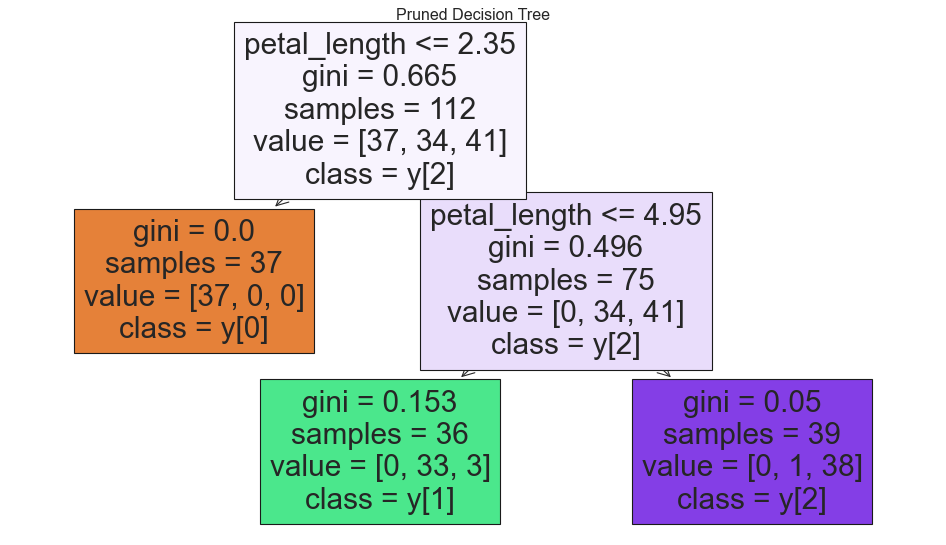

In [23]:
plt.figure(figsize = [15,8])

plot_tree(clf_prune, filled=True, feature_names = X.columns, class_names = True)
plt.title("Pruned Decision Tree")
plt.show()

### 特征重要性

petal_length    1.0
sepal_length    0.0
sepal_width     0.0
petal_width     0.0
dtype: float64


<AxesSubplot:>

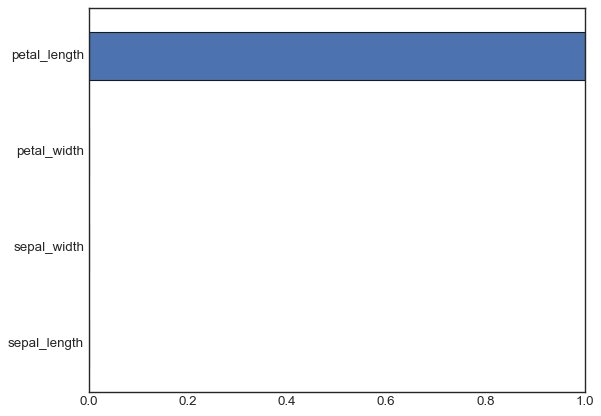

In [24]:
import pandas as pd

importances = clf_prune.feature_importances_
weights = pd.Series(importances,
                 index=X.columns)

print(weights.sort_values(ascending=False))

weights.sort_values().plot(kind = 'barh')

### 在测试集预测

In [25]:
y_pred_prune = clf_prune.predict(X_test)
y_pred_prune 

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

### 评价剪枝后的树

In [26]:
test_accuracy_prune = clf_prune.score(X_test, y_test)
print("Pruned Accuracy", test_accuracy_prune)

Pruned Accuracy 0.8947368421052632


In [27]:
from sklearn import metrics
test_precision = metrics.precision_score(y_test, y_pred_prune, average = 'macro')
print("Precision", test_precision)

test_recall = metrics.recall_score(y_test, y_pred_prune, average = 'macro')
print("Recall:", test_recall)

test_f1 = metrics.f1_score(y_test, y_pred_prune, average = 'macro')
print("test_f1:", test_f1)

Precision 0.8968253968253969
Recall: 0.8680555555555555
test_f1: 0.8774509803921569


## Q1. 尝试ccp_alpha = 0.01, 0.1

## Q2. 尝试设置max_depth = 4

## Q3: 如何用交叉验证法选择alpha?

### 方法一：参见HW 4 选做题

第一步：需要用到的函数：clf.cost_complexity_pruning_path 设置一系列alpha的备选值 https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

第二步：使用cross_val_score： 计算在每个alpha下的K折平均交叉验证正确率 https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

参考https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

第三步：选取使得K折平均交叉验证正确率达到最小的alpha为最优alpha

第四步：使用最优alpha，重新在训练集上做拟合

### 方法二：使用网格搜索法GridSearchCV

sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


estimator: 代表使用的模型
param_grid: 需要最优化的参数的取值，值为字典或者列表。需要给出参数名以及参数的可能取值
scoring: 模型评价指标。在分类问题中，常见的为'accuracy','f1'(两分类),'f1_micro','f1_macro',"roc_auc"(两分类)等，更多见下方链接。
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

cv: 交叉验证次数

### 第一步：加载设置网格搜索

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {"ccp_alpha": [0.001,0.005,0.01,0.02,0.05,0.1,0.5]
              }

clf_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring='accuracy')

### 第二步：在训练集上进行网格搜索

In [29]:
clf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1,
                                       0.5]},
             scoring='accuracy')

### 第三步：找到最优的分类树

In [30]:
best_clf = clf_cv.best_estimator_

### 最优的ccp_alpha值

In [31]:
print(clf_cv.best_params_)

{'ccp_alpha': 0.02}


In [32]:
best_clf

DecisionTreeClassifier(ccp_alpha=0.02)

### 第四步：使用最优的分类树在测试集上做预测

In [33]:
y_pred_best = best_clf.predict(X_test)
y_pred_best 

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

### 在测试集上计算分类正确率、precision, recall, f1值

In [34]:
test_accuracy_best = best_clf.score(X_test, y_test)
print("Best Accuracy", test_accuracy_best)

Best Accuracy 0.9736842105263158


In [35]:
from sklearn import metrics
test_precision = metrics.precision_score(y_test, y_pred_best, average = 'macro')
print("Precision", test_precision)

test_recall = metrics.recall_score(y_test, y_pred_best, average = 'macro')
print("Recall:", test_recall)

test_f1 = metrics.f1_score(y_test, y_pred_best, average = 'macro')
print("test_f1:", test_f1)

Precision 0.9666666666666667
Recall: 0.9791666666666666
test_f1: 0.9717034521788342


## Q4: 如何做回归树？

使用DecisionTreeRegressor:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.score